In [1]:
import os
curr_dir = os.getcwd()
dataset_dir = os.path.join(curr_dir,'Dataset')
print(os.listdir(dataset_dir))

['english_hope_dev.csv', 'english_hope_train.csv', 'malayalam_hope_dev.csv', 'malayalam_hope_train.csv', 'tamil_hope_first_dev.csv', 'tamil_hope_first_train.csv']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
df_train = pd.read_csv(os.path.join(dataset_dir,'english_hope_train.csv'))
df_dev = pd.read_csv(os.path.join(dataset_dir,'english_hope_dev.csv'))

### Basic Data Visualizations

In [4]:
df_train.sample(10)

,text,label
1119,They only care about black people so i doubt it,Non_hope_speech
21381,@MfZ homosexuality has been documented to a pa...,Non_hope_speech
4939,If ypu are white then its not your country. It...,Non_hope_speech
385,first of all black people are a minority secon...,Non_hope_speech
8803,@it'sMe TheHerpes go move to N.Korea with Denn...,Non_hope_speech
5933,I'm starting a petition to start the race war.,Non_hope_speech
8926,@MrCosmin94 What do you think happens to you ...,Non_hope_speech
978,i think watching crystal in these videos it's ...,Hope_speech
20503,This is how the Irish problem started!nPolitic...,Non_hope_speech
4788,The democratis are basically saying that they ...,Non_hope_speech


In [5]:
df_train.shape

(22762, 2)

Text(0, 0.5, 'Counts')

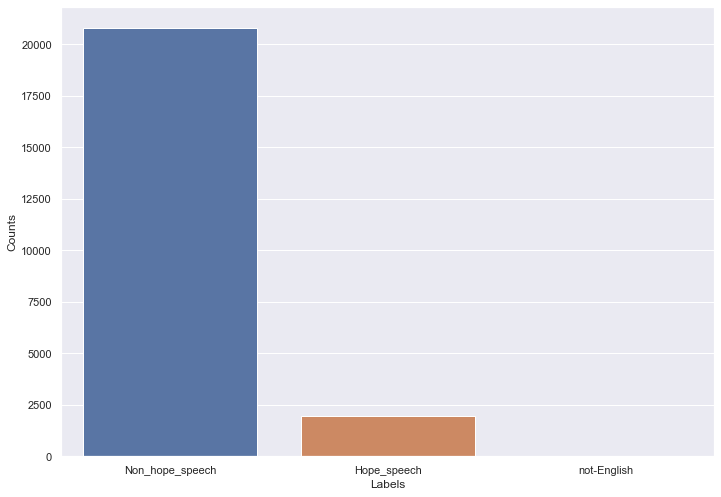

In [6]:
sns.countplot(x = df_train['label'])
plt.xlabel('Labels')
plt.ylabel('Counts')

In [7]:
df_train['label'].value_counts()

Non_hope_speech    20778
Hope_speech         1962
not-English           22
Name: label, dtype: int64

In [8]:
# df_train[df_train['label'] == 'not-English']

In [9]:
# df1_rem = df_train[df_train['label'] == 'not-English']
# df1_rem

In [10]:
# df_train = df_train.drop(df1_rem.index,axis = 0)

In [11]:
df_train

,text,label
0,these tiktoks radiate gay chaotic energy and i...,Non_hope_speech
1,@Champions Again He got killed for using false...,Non_hope_speech
2,It's not that all lives don't matter,Non_hope_speech
3,Is it really that difficult to understand? Bla...,Non_hope_speech
4,Whenever we say black isn't that racists? Why...,Non_hope_speech
...,...,...
22757,It's a load of bollocks every life matters sim...,Non_hope_speech
22758,no say it because all lives matter! deku would...,Non_hope_speech
22759,God says her life matters,Non_hope_speech
22760,This video is just shit. A bunch of whiny ass ...,Non_hope_speech


In [12]:
# df_dev[df_dev['label'] == 'not-English']

In [13]:
# df1_rem = df_dev[df_dev['label'] == 'not-English']
# df1_rem

In [14]:
# df_dev = df_dev.drop(df1_rem.index,axis = 0)

In [15]:
# df_dev

In [16]:
text_lengths = df_train['text'].map(len)
text_lengths

0         54
1         52
2         36
3        452
4         72
        ... 
22757     57
22758     75
22759     25
22760     76
22761     56
Name: text, Length: 22762, dtype: int64

C:\Users\Nikhil\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text', ylabel='Density'>

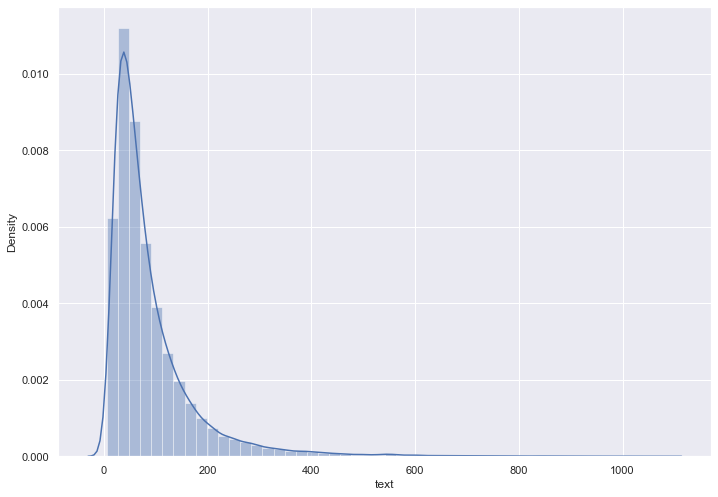

In [17]:
sns.distplot(text_lengths)

In [18]:
# df_train[df_train['label'] == 'not-English']

In [19]:
# df1_rem = df_train[df_train['label'] == 'not-English']
# df1_rem

In [20]:
# df_train = df_train.drop(df1_rem.index,axis = 0)

In [21]:
# df_dev[df_dev['label'] == 'not-English']

In [22]:
# df1_rem = df_dev[df_dev['label'] == 'not-English']
# df1_rem

In [23]:
# df_dev = df_dev.drop(df1_rem.index,axis = 0)

In [24]:
# df_dev

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [26]:
print("We have {} unique classes".format(len(df_train['label'].unique())))
print("We have {} training samples".format(len(df_train.text)))
print("We have {} test samples".format(len(df_dev.text)))

We have 3 unique classes
We have 22762 training samples
We have 2843 test samples


In [27]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(df_train.text, df_train.label)
# Predict the categories of the dev data
predicted_categories = model.predict(df_dev.text)

In [28]:
predicted_categories

array(['Non_hope_speech', 'Non_hope_speech', 'Non_hope_speech', ...,
       'Non_hope_speech', 'Non_hope_speech', 'Non_hope_speech'],
      dtype='<U15')

In [29]:
print(classification_report(df_dev.label,predicted_categories , target_names=df_train['label'].unique()))

                 precision    recall  f1-score   support

Non_hope_speech       0.00      0.00      0.00       272
    Hope_speech       0.90      1.00      0.95      2569
    not-English       0.00      0.00      0.00         2

       accuracy                           0.90      2843
      macro avg       0.30      0.33      0.32      2843
   weighted avg       0.82      0.90      0.86      2843



C:\Users\Nikhil\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
df_dev['label'].value_counts()

Non_hope_speech    2569
Hope_speech         272
not-English           2
Name: label, dtype: int64

In [31]:
df_train = pd.read_csv(os.path.join(dataset_dir,'malayalam_hope_train.csv'))
df_dev = pd.read_csv(os.path.join(dataset_dir,'malayalam_hope_dev.csv'))

In [32]:
df_train.sample(10)

,text,label
5795,എന്തൊക്കെ science prove ചെയ്താലും ആരൊക്കെ ന്യാ...,Non_hope_speech
6546,Pubg uninstall cheyyano... Listil indo,Non_hope_speech
6428,Saleem shame on you.,not-malayalam
3259,@s4 STORY pinne ethu game um oru dhivasam maa...,Non_hope_speech
182,Aandava. Athaanu maranam. Nammlum marikkum val...,Non_hope_speech
676,ഹാപ്പി വെഡിങ് ഡേ സൂര്യ അമ്മ,Hope_speech
808,Njan gay aanu veno,Non_hope_speech
7630,Njaan freefire aaki,Non_hope_speech
6907,@Pramod M ithupole ullavare angeegarikkan patt...,Hope_speech
1926,എനിക്ക് sonu നെ ishtaaayee,Hope_speech


In [33]:
df_train.shape

(8564, 2)

Text(0, 0.5, 'Counts')

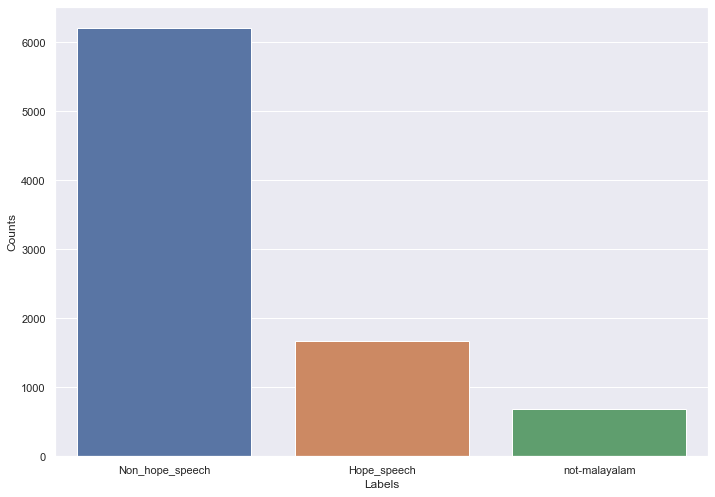

In [34]:
sns.countplot(x = df_train['label'])
plt.xlabel('Labels')
plt.ylabel('Counts')

In [35]:
df_train['label'].value_counts()

Non_hope_speech    6205
Hope_speech        1668
not-malayalam       691
Name: label, dtype: int64

In [36]:
# df_train[df_train['label'] == 'not-malayalam']

In [37]:
# df1_rem = df_train[df_train['label'] == 'not-malayalam']
# df1_rem

In [38]:
# df_train = df_train.drop(df1_rem.index,axis = 0)

In [39]:
# df_train

In [40]:
# df_dev[df_dev['label'] == 'not-malayalam']

In [41]:
# df1_rem = df_dev[df_dev['label'] == 'not-malayalam']
# df1_rem

In [42]:
# df_dev = df_dev.drop(df1_rem.index,axis = 0)

In [43]:
# df_dev

In [44]:
text_lengths = df_train['text'].map(len)
text_lengths

0        66
1        91
2       255
3        91
4       188
       ... 
8559     39
8560     54
8561     20
8562     73
8563    153
Name: text, Length: 8564, dtype: int64

C:\Users\Nikhil\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text', ylabel='Density'>

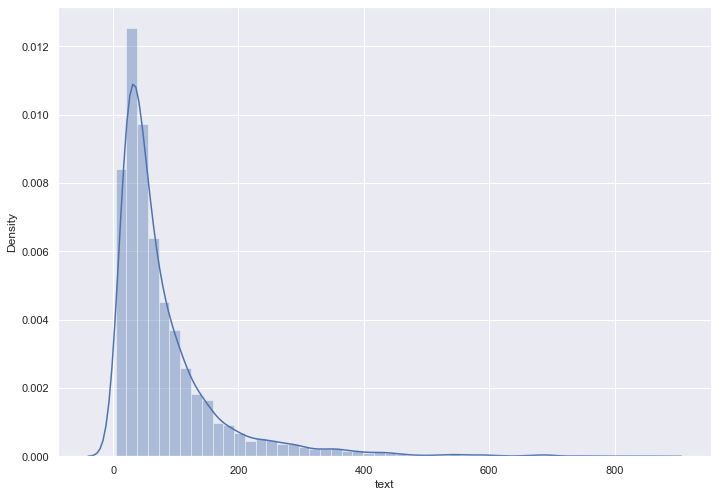

In [45]:
sns.distplot(text_lengths)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [47]:
print("We have {} unique classes".format(len(df_train['label'].unique())))
print("We have {} training samples".format(len(df_train.text)))
print("We have {} test samples".format(len(df_dev.text)))

We have 3 unique classes
We have 8564 training samples
We have 1070 test samples


In [48]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(df_train.text, df_train.label)
# Predict the categories of the dev data
predicted_categories = model.predict(df_dev.text)

In [49]:
predicted_categories

array(['Non_hope_speech', 'Non_hope_speech', 'Non_hope_speech', ...,
       'Non_hope_speech', 'Non_hope_speech', 'Non_hope_speech'],
      dtype='<U15')

In [50]:
print(classification_report(df_dev.label,predicted_categories , target_names=df_train['label'].unique()))

                 precision    recall  f1-score   support

Non_hope_speech       0.64      0.16      0.25       190
    Hope_speech       0.78      0.99      0.87       784
  not-malayalam       0.79      0.20      0.32        96

       accuracy                           0.77      1070
      macro avg       0.74      0.45      0.48      1070
   weighted avg       0.75      0.77      0.71      1070



In [51]:
df_train = pd.read_csv(os.path.join(dataset_dir,'tamil_hope_first_train.csv'))
df_dev = pd.read_csv(os.path.join(dataset_dir,'tamil_hope_first_dev.csv'))

In [52]:
df_train.sample(10)

,text,label
11735,Yaaru V2 kum kooda poga mudila... Kolanthainga...,Non_hope_speech
3299,Ellathukumae alternative ah maximum jio dhan i...,Non_hope_speech
710,Crt bro china karanga carona virus thaakka pat...,Non_hope_speech
5023,Porumaiya sollupa...yen parakkura,Non_hope_speech
12875,Chennai corona control இல்ல. Testing kammi PA...,Non_hope_speech
3499,gulf countrys parava illa ivanungaluku avanung...,Hope_speech
14977,Adhan discription la sollirkanga,Hope_speech
9170,Ha ha ha ha ha,not-Tamil
4703,Free fire vilaiyadalama bro,Hope_speech
13333,Good news bro,Hope_speech


In [53]:
df_train.shape

(16160, 2)

Text(0, 0.5, 'Counts')

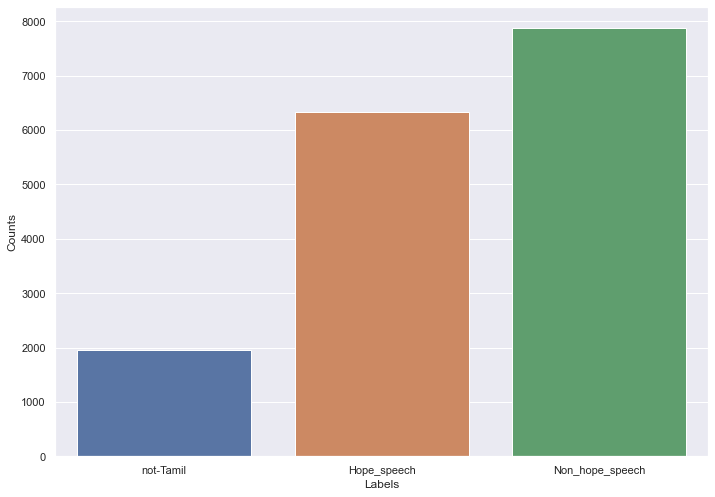

In [54]:
sns.countplot(x = df_train['label'])
plt.xlabel('Labels')
plt.ylabel('Counts')

In [55]:
df_train['label'].value_counts()

Non_hope_speech    7872
Hope_speech        6327
not-Tamil          1961
Name: label, dtype: int64

In [56]:
# df_train[df_train['label'] == 'not-Tamil']

In [57]:
# df1_rem = df_train[df_train['label'] == 'not-Tamil']
# df1_rem

In [58]:
# df_train = df_train.drop(df1_rem.index,axis = 0)

In [59]:
# df_train

In [60]:
# df_dev[df_dev['label'] == 'not-Tamil']

In [61]:
# df1_rem = df_dev[df_dev['label'] == 'not-Tamil']
# df1_rem

In [62]:
# df_dev = df_dev.drop(df1_rem.index,axis = 0)

In [63]:
# df_dev

In [64]:
text_lengths = df_train['text'].map(len)
text_lengths

0         20
1         59
2         73
3        125
4         18
        ... 
16155     26
16156     76
16157    120
16158     25
16159     22
Name: text, Length: 16160, dtype: int64

C:\Users\Nikhil\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='text', ylabel='Density'>

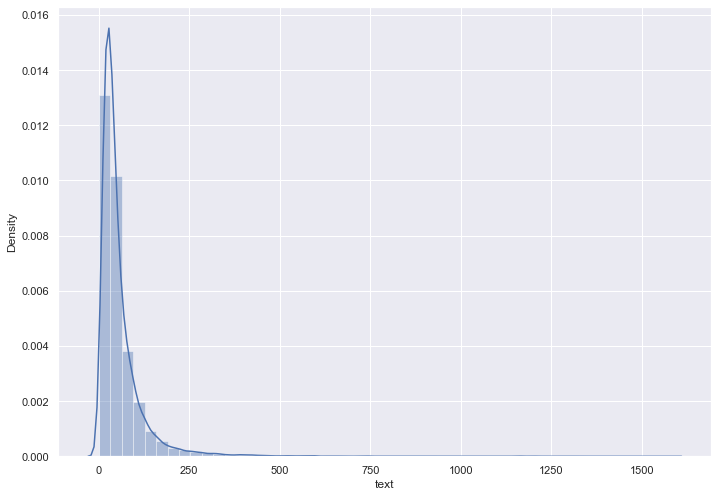

In [65]:
sns.distplot(text_lengths)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [67]:
print("We have {} unique classes".format(len(df_train['label'].unique())))
print("We have {} training samples".format(len(df_train.text)))
print("We have {} test samples".format(len(df_dev.text)))

We have 3 unique classes
We have 16160 training samples
We have 2018 test samples


In [68]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(df_train.text, df_train.label)
# Predict the categories of the dev data
predicted_categories = model.predict(df_dev.text)

In [69]:
predicted_categories

array(['Hope_speech', 'Hope_speech', 'Non_hope_speech', ...,
       'Non_hope_speech', 'Hope_speech', 'Non_hope_speech'], dtype='<U15')

In [70]:
print(classification_report(df_dev.label,predicted_categories , target_names=df_train['label'].unique()))

                 precision    recall  f1-score   support

      not-Tamil       0.57      0.42      0.49       757
    Hope_speech       0.61      0.85      0.71       998
Non_hope_speech       0.72      0.20      0.31       263

       accuracy                           0.61      2018
      macro avg       0.63      0.49      0.51      2018
   weighted avg       0.61      0.61      0.58      2018

